<a href="https://colab.research.google.com/github/kingchou007/Book-Mathmatical-Foundation-of-Reinforcement-Learning/blob/main/src/gym_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym[atari]
!pip install multi-agent-ale-py
!apt-get install -y xvfb python-opengl ffmpeg x11-utils > /dev/null 2>&1
!pip install autorom[accept-rom-license]
!AutoROM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.5/778.5 kB 10.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446676 sha256=581c33398280272a217f2e434146d54f877a36c15fbdef2f6ff321cb1885e044
  Stored in directory: /root/.cache/pip/wheels/b1/1f/f7/2da07cf4f81ea264bdaf043028749d88fe0c2227134a22cf80
Successfully built AutoROM.ac

In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from IPython.core.display import HTML

| Action    | Behavior  |
|:---------:|-----------|
| 0         | No operation |
| 1         | Fire |
| 2         | Move up |
| 3         | Move right |
| 4         | Move left |
| 5         | Move down |
| 6         | Move upright |
| 7         | Move upleft |
| 8         | Move downright |
| 9         | Move downleft |
| 10        | Fire up |
| 11        | Fire right |
| 12        | Fire left |
| 13        | Fire down |
| 14        | Fire upright |
| 15        | Fire upleft |
| 16        | Fire downright |
| 17        | Fire downleft |

In [3]:
### create an env ###
class Tennis(gym.Wrapper):
    def __init__(self):
        # Action Space Discrete(18)
        # Observation spaces have shape (210, 160, 3) and values in range [0, 255]
        env = gym.make('ALE/Tennis-v5', difficulty=3, mode=0, new_step_api=True)
        gym.Wrapper.__init__(self, env)
        self.env = env
        self.action_space = gym.spaces.Discrete(18)
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(210, 160, 3), dtype=np.uint8)
    
    def rest(self):
        state, _, _, _, _ = self.env.reset()
        self.env.reset()
        return state
    
    def step(self, action):
        r = self.env.step(action)
        return r
    
Tennis().reset()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 82, 126,  45],
        [ 82, 126,  45],
        [ 82, 126,  45]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 82, 126,  45],
        [ 82, 126,  45],
        [ 82, 126,  45]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 82, 126,  45],
        [ 82, 126,  45],
        [ 82, 126,  45]]

In [16]:
### test our env ###
def test(env, wrap_action_in_list=False):
    state = env.reset()
    over = False
    step = 0

    while not over:
        action = env.action_space.sample()
        if wrap_action_in_list:
            action = [action]
        r = np.array(env.step(action), dtype=object)
        
        next_state, reward, done, _, _= env.step(action) # shape = (5,)
        if step % 20 == 0:
            # TODO: reward always 0
            print('step: {}, action: {}, reward: {}, over: {}'.format(step, action, reward, over))
            
        step += 1
       
        if step > 100:
            
            print('Observation Space[0]: ', len(r[0]))
            print('Observation Space: ', r[0].shape) # Observation Space (210, 160, 3)
            print(r[1],r[2],r[3],r[4])

            break
        state = next_state
        step += 1
        
test(Tennis())

step: 0, action: 5, reward: 0.0, over: False
step: 20, action: 10, reward: 0.0, over: False
step: 40, action: 1, reward: 0.0, over: False
step: 60, action: 16, reward: 0.0, over: False
step: 80, action: 8, reward: 0.0, over: False
step: 100, action: 1, reward: 0.0, over: False
Observation Space[0]:  210
Observation Space:  (210, 160, 3)
0.0 False False {'lives': 0, 'episode_frame_number': 404, 'frame_number': 404}


You control the orange player playing against a computer-controlled blue player. The game follows the rules of tennis. The first player to win atleast 6 games with a margin of atleast two games wins the match. If the score is tied at 6-6, the first player to go 2 games up wins the match. Detailed documentation can be found on the AtariAge page

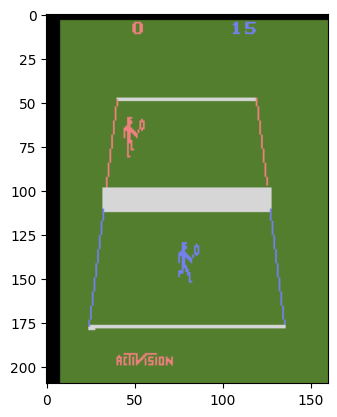

In [17]:
### demo ###
# Create the environment
env = gym.make('ALE/Tennis-v5')
# Reset the environment and get the initial screen
env.reset()
prev_screen = env.render(mode='rgb_array')
# Display the initial screen
plt.imshow(prev_screen)
total_reward = 0

# Run the simulation for 50 steps
for i in range(50):
    # Choose a random action
    action = env.action_space.sample()
    
    # Take a step in the environment
    obs, reward, done, info = env.step(action)
    print('step: {}, action: {}, reward: {}'.format(i, action, reward))
    total_reward += reward
    
    # Get the current screen
    screen = env.render(mode='rgb_array')
    
    # Display the current screen
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
    # If the episode is done, exit the loop
    if done:
        break

# Close the environment
ipythondisplay.clear_output(wait=True)
env.close()


In [18]:
print(total_reward) # reward check

-1.0
